<a href="https://colab.research.google.com/github/AanchalKankrecha/Playstore-Data-Analysis/blob/main/Playstore_App_Review_Analysis_Capston_Project_Aanchal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.


# **STEP 1 : Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


## **STEP 2 : Loading the Playstore dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [182]:
#df=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /Play Store Data.csv')
df=pd.read_csv('/content/drive/MyDrive/Capstone Project/EDA/Play Store App Review Analysis/Play Store Data (1).csv')

## **STEP 3 : Having overview and understanding the dataset**

1. Basic Data information

In [183]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [184]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [185]:
df.shape

(10841, 13)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [187]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Five coulmns are having null values.


### CLEANING DATA

1. Duplicate Values

In [188]:
df['App'].duplicated().any()

True

In [189]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [190]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [191]:
df.drop_duplicates(subset='App',keep='first',inplace=True) 

In [192]:
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [193]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           5331
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             119
Last Updated      1378
Current Ver       2818
Android Ver         33
dtype: int64

In [194]:
df.shape

(9660, 13)

2. Category

In [195]:
pd.DataFrame(df.Category.unique(),columns=['category'])

,category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [196]:
df.loc[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



From the data entered in the above row i.e
Category is 1.9 which is not possible.
Rating is 19 which is not possible as rating cannot be more than 5.
Installs is Free which again indicate a wrong entry because Install column provides the number of intalls of that particular app which must be a number.
Genres contain a date entry which again evident that this row is a wrong entry.
So we have enough evidence to drop this row.

In [197]:
df=df.drop(10472)

In [198]:
df.shape

(9659, 13)

3. Price

In [199]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have to remove the characters '$' , ',' , '+' and then convert the datatype to float.

In [200]:
char_to_remove=[',','$']
for char in char_to_remove:
  df['Price']=df['Price'].apply(lambda x:x.replace(char,""))

In [201]:
df['Price']=df['Price'].astype(float)

4. Installs

In [202]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

We have to remove the characters  ',' , '+' and then convert the datatype to integer type

In [203]:
char_to_remove=['+',',']
for char in char_to_remove:
  df['Installs']=df['Installs'].apply(lambda x:x.replace(char,""))

In [204]:
df['Installs']=df['Installs'].astype(int)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


5. Type

In [206]:
pd.DataFrame(df.Type.unique())

,0
0,Free
1,Paid
2,NaN


In [207]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since the Price of Row number 9148 is 0.0 ,hence we can fill the type with 'Free'.

In [208]:
df['Type']=df['Type'].fillna('Free')

In [209]:
df['Size'].isnull().sum()
#df["size"]=df['Size'].fillna

0

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


6. Rating

We can see that there are some null values in Rating column, we can fill these null values with zero (Since there are no ratings given to app, we can assume that Customer is not interested in that particular app)

In [211]:
df['Rating']=df['Rating'].fillna(0)

7. Reviews

In [212]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [213]:
df['Reviews']=df['Reviews'].astype(float)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


8. Size

In [229]:
df['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', '9.4000', '15000', '10000', '1.2000', '26000', '8.0000',
       '7.9000', '56000', '57000', '35000', '54000', '201', '3.6000',
       '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000', '3.4000',
       '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000', '18000',
       '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', '4100

Since the size are in kb, mb and 'varies with device'.
first we will remove '+' sign or ',' (if any) and then convert 'k' to '' and 'M' to '000' and finally 'varies with device' to NaN values. 
After we convert it to numeric values.

In [216]:
df['Size']=df.Size.apply(lambda x:x.strip('+'))
df['Size']=df['Size'].apply(lambda x:x.replace(',','')) 
df['Size']=df.Size.apply(lambda x: x.replace('k','')) 
df['Size']=df['Size'].apply(lambda x:x.replace('M','000')) 
df['Size']=df.Size.replace('Varies with device',np.NaN) 
df['Size'].head(10)

0     19000
1     14000
2    8.7000
3     25000
4    2.8000
5    5.6000
6     19000
7     29000
8     33000
9    3.1000
Name: Size, dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


9. Dropping unwanted columns

We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

['Last Updated' , 'Current Ver' , 'Android Ver']

In [40]:
# df=df.drop(['Last Updated' , 'Current Ver' , 'Android Ver'],axis=1)

In [41]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


Now we are done with the data Processing and Cleaning.
we can see that originally there were 10841 Rows and 13 Columns and in our cleaned Data we have 9659 Rows and 13 Columns (all are non-null,except Size)

In [228]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [227]:
#m=df['Size'].mode()
#df[df['Size'].fillna(m)]
df['Size'].fillna(df.Size.mode()[0], inplace=True)
df.Size.mode()

0    11000
dtype: object

**USER REVIEW DATASET**

In [44]:
#df2=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /User Reviews.csv')
df2=pd.read_csv('/content/drive/MyDrive/Capstone Project/EDA/Play Store App Review Analysis/Copy of User Reviews.csv')

In [45]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [46]:
df2.shape

(64295, 5)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [48]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [49]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.064703,0.147597,0.070582,-0.014319
Reviews,0.064703,1.000000,0.176255,0.625165,-0.007598
Size,0.147597,0.176255,1.000000,0.133988,-0.022141
Installs,0.070582,0.625165,0.133988,1.000000,-0.009405
Price,-0.014319,-0.007598,-0.022141,-0.009405,1.000000


Which category has the highest number of installs

In [285]:
category_install=pd.DataFrame(df.groupby(by='Category',as_index=False)['Installs'].sum())
category_install.sort_values(by=['Installs'],ascending=False,inplace=True)

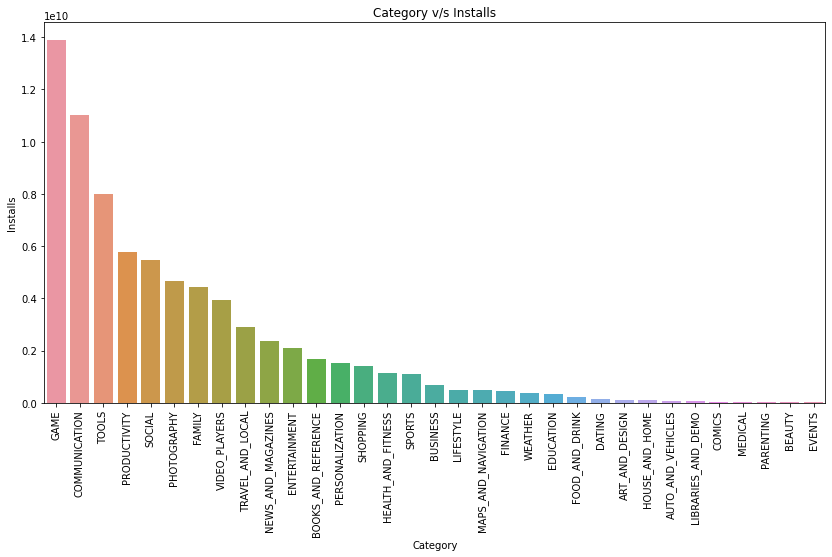

In [286]:
plt.figure(figsize=(14,7))
plt.xlabel('Categories')
plt.ylabel('Number of Installs')
plt.title('Category v/s Installs')
plt.xticks(rotation=90)
sns.barplot(x=category_install['Category'],y=category_install['Installs'])
plt.show()

To find top 3 gaming apps?

In [326]:
top_gaming_app=pd.DataFrame(df[df['Category']=='GAME'].sort_values(by=['Installs'],ascending=False).head(3)['App']).reset_index(drop=True)
top_gaming_app

,App
0,Subway Surfers
1,Candy Crush Saga
2,Temple Run 2


To find top 3 communication apps?

In [328]:
top_communication_app=pd.DataFrame(df[df['Category']=='COMMUNICATION'].sort_values(by=['Installs'],ascending=False).head(3)['App']).reset_index(drop=True)

To find top 3 tooling apps?

In [329]:
top_tool_app=pd.DataFrame(df[df['Category']=='TOOLS'].sort_values(by=['Installs'],ascending=False).head(3)['App']).reset_index(drop=True)

In [330]:
top=pd.DataFrame()
top['game']=top_gaming_app['App']
top['communication']=top_communication_app['App']
top['tool']=top_tool_app['App']
top


,game,communication,tool
0,Subway Surfers,Messenger – Text and Video Chat for Free,Google
1,Candy Crush Saga,Skype - free IM & video calls,Google Translate
2,Temple Run 2,WhatsApp Messenger,Clean Master- Space Cleaner & Antivirus


Which are the apps with highest number of reviews?


In [52]:
app_reviews=df[['App','Reviews']].sort_values('Reviews',ascending=False).reset_index(drop=True).head(20)
app_reviews

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577313.0
3,Messenger – Text and Video Chat for Free,56642847.0
4,Clash of Clans,44891723.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27722264.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23133508.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


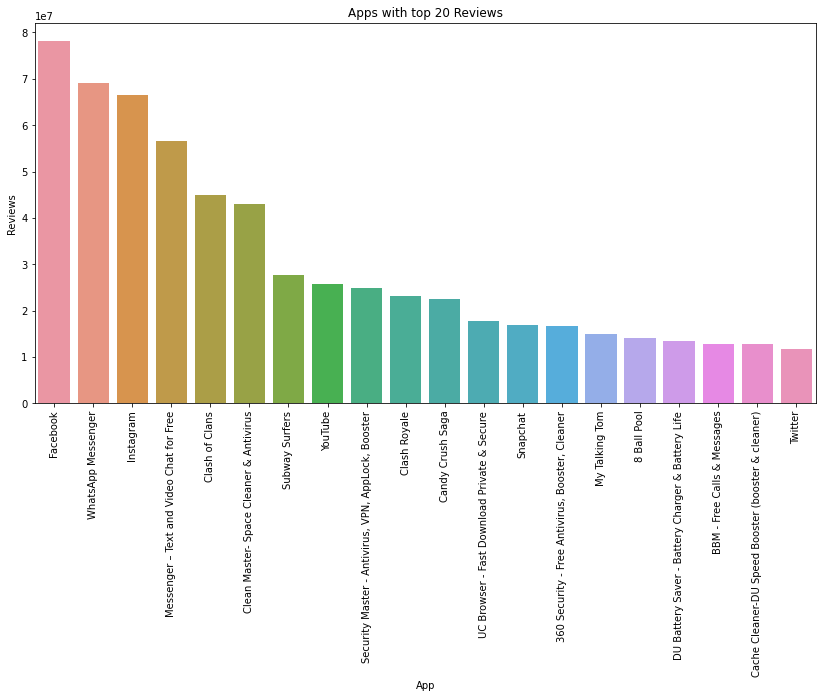

In [53]:
plt.figure(figsize=(14,7))
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.title('Apps with top 20 Reviews')
plt.xticks(rotation=90)
sns.barplot(app_reviews.App,app_reviews.Reviews)
plt.show()

What is the average rating of app on playstore

Average rating of app on playstore

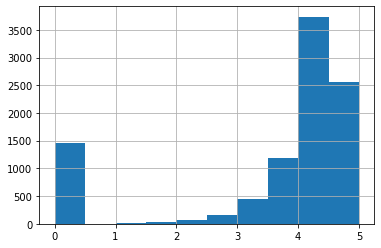

In [54]:
df['Rating'].hist()

In [55]:
print('avg mean is',np.mean(df['Rating']))

avg mean is 3.541142975463299


In [56]:
#df['Rating']=df['Rating'].round()

In [57]:
rating_install=df.groupby(['Rating'],as_index=False)['Installs'].sum()
rating_install

,Rating,Installs
0,0.0,5862189
1,1.0,5170
2,1.2,1000
3,1.4,7000
4,1.5,1105
5,1.6,152000
6,1.7,81700
7,1.8,519500
8,1.9,189000
9,2.0,5040150


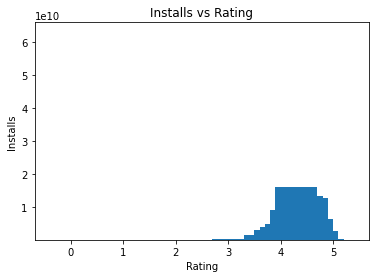

In [58]:
plt.bar(rating_install['Rating'],rating_install['Installs'])
plt.title('Installs vs Rating')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.ylim([13000,66000000000])
plt.show()

In [59]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

no. of free vs paid apps??


In [60]:
type_df=df.groupby(['Type'],as_index=False)['App'].count()
type_df

,Type,App
0,Free,8903
1,Paid,756


In [61]:
content_rating=df.groupby(['Content Rating'],as_index=False).count()
content_rating

,Content Rating,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
0,Adults only 18+,3,3,3,3,2,3,3,3,3,3,3,3
1,Everyone,7903,7903,7903,7903,6917,7903,7903,7903,7903,7903,7895,7901
2,Everyone 10+,322,322,322,322,273,322,322,322,322,322,322,322
3,Mature 17+,393,393,393,393,340,393,393,393,393,393,393,393
4,Teen,1036,1036,1036,1036,898,1036,1036,1036,1036,1036,1036,1036
5,Unrated,2,2,2,2,2,2,2,2,2,2,2,2


In [62]:
content_rating=pd.DataFrame(df[['Content Rating']])['Content Rating'].value_counts()
content_rating

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

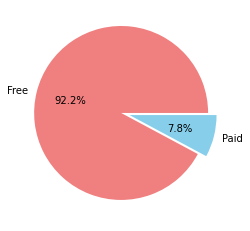

In [63]:
labels=type_df['Type']
sizes=type_df['App']
colors=['lightcoral','skyblue']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
#plt.axis('equal')
plt.show()


In [64]:
app_install=pd.DataFrame(df[['App','Installs']].sort_values(by=['Installs']))
app_install

,App,Installs
8614,Sweden Newspapers,0
5307,Ak Parti Yardım Toplama,0
9337,EG | Explore Folegandros,0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0
9917,Eu Sou Rico,0
...,...,...
2545,Instagram,1000000000
2544,Facebook,1000000000
865,Google Play Games,1000000000
3234,Google,1000000000


In [65]:
app_install[app_install['Installs']==1000000000]['App'].count()
#df[df['Type'].isna()]

20

In [100]:
category=pd.DataFrame(df.groupby(['Category','Type'])['App'].count()).reset_index()
app_count=category.pivot('Category','Type','App').fillna(0).reset_index()
app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


In [96]:
category.head(10)

,Category,Type,App
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,194
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


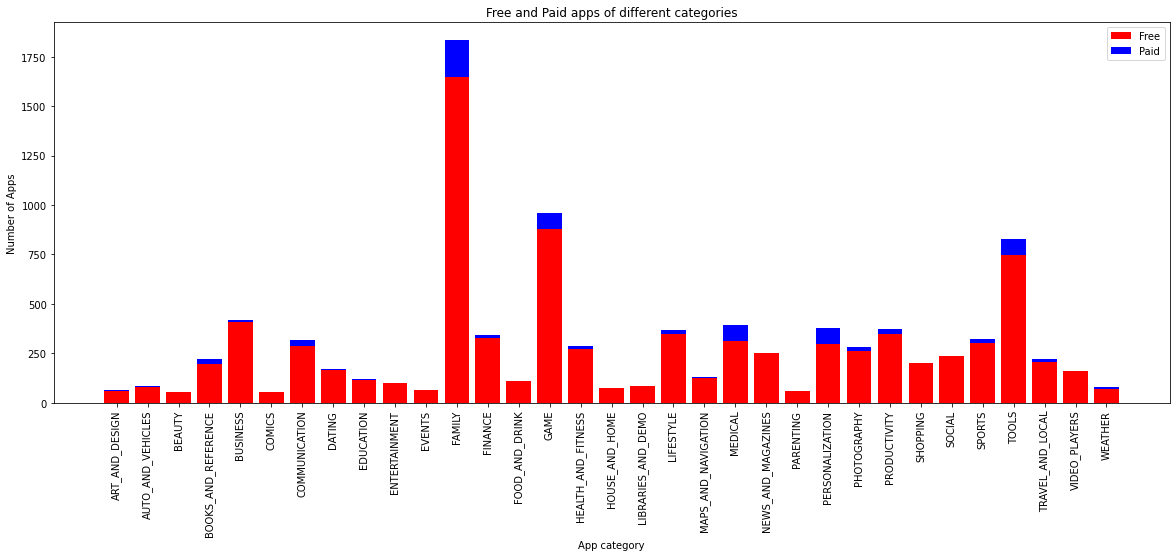

In [127]:
x=list(app_count['Category'])
y1=list(app_count['Free'])
y2=list(app_count['Paid'])
plt.figure(figsize=(20,7))
plt.xlabel('App category')
plt.ylabel('Number of Apps')
plt.title('Free and Paid apps of different categories')
plt.xticks(rotation=90)
plt.bar(x,app_count['Free'],color='r',label='Free')
plt.bar(x,app_count['Paid'],bottom=app_count['Free'],color='b',label='Paid')
plt.legend()
plt.show()


In [136]:
crm=df.corr()
crm

,Rating,Reviews,Installs,Price
Rating,1.000000,0.064703,0.070582,-0.014319
Reviews,0.064703,1.000000,0.625165,-0.007598
Installs,0.070582,0.625165,1.000000,-0.009405
Price,-0.014319,-0.007598,-0.009405,1.000000


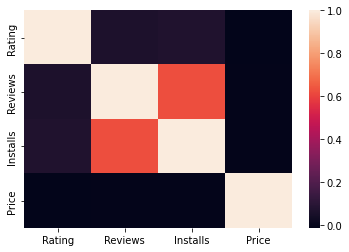

In [137]:
heat_map=sns.heatmap(crm)

In [138]:
review_install=pd.DataFrame(df.groupby(['Reviews'],as_index=False)['Installs'].sum())

In [139]:
review_install

,Reviews,Installs
0,0.0,430696
1,1.0,1031006
2,2.0,94438
3,3.0,64920
4,4.0,52567
...,...,...
5325,44891723.0,100000000
5326,56642847.0,1000000000
5327,66577313.0,1000000000
5328,69119316.0,1000000000


In [140]:
review_install.columns

Index(['Reviews', 'Installs'], dtype='object')

In [141]:
#plt.line(review_install)

In [142]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [143]:
df.dtypes 

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [144]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [155]:
df['Size'].fillna(str(df['Size'].mode()),inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [147]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Last Updated'].isnull().sum()

0

No null values in Last Updated column


In [148]:
updated_app=pd.DataFrame(df[['App','Last Updated']].sort_values(by=['Last Updated'],ascending=False))

In [149]:
update_count=pd.DataFrame(updated_app.groupby(by=['Last Updated'],as_index=False).count())


<function matplotlib.pyplot.show(*args, **kw)>

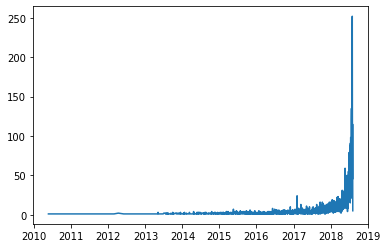

In [150]:
plt.plot(update_count["Last Updated"],update_count["App"])
plt.show

In [151]:
update_count[update_count['App']==update_count["App"].max()]


,Last Updated,App
1371,2018-08-03,252


Maximum number of apps updated is **252** on 2018-08-03

Histogram of App Size 

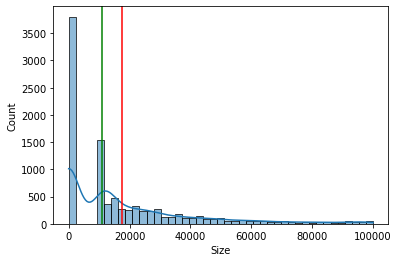

In [243]:
df['Size']=df['Size'].astype(int)
sns.histplot(data=df['Size'],kde=True)
plt.axvline(df['Size'].mean(),color='r')
plt.axvline(df['Size'].median(),color='g')

From the above plot we can infer that data of size is **right tailed** because **mean>median**

In [288]:
install_content=df.groupby(by=['Content Rating'],as_index=False)['Installs'].sum()
install_content.sort_values(by=['Installs'],inplace=True,ascending=False)
install_content

,Content Rating,Installs
1,Everyone,52179352961
4,Teen,16487275393
2,Everyone 10+,4016271795
3,Mature 17+,2437986878
0,Adults only 18+,2000000
5,Unrated,50500


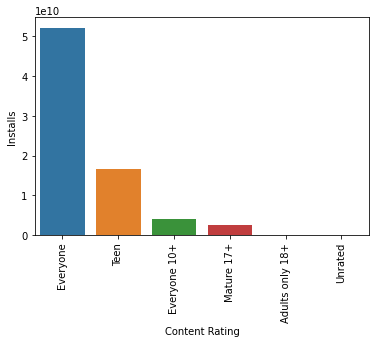

In [297]:
sns.barplot(x=install_content['Content Rating'],y=install_content['Installs'])
plt.xticks(rotation=90)
plt.show()

From above plot we can infer that maximum no. of apps intalled belongs to games category followed by communication,tools,productivity then social and least no. of apps intall belongs to event category. 

Finding out top 3 games in terms of higher installs??

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [386]:
df3=pd.DataFrame(df2.loc[df2["Translated_Review"].isnull()])
df3


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


26868 rows are having NaN values in all the column except app name.So it does not contain any data.Therefore we can drop those rows


In [370]:
index=df3.index
df2.drop(index,inplace=True)
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [397]:
df4=df2.groupby(by=['App'],as_index=False)['Translated_Review'].count().reset_index(drop=True)
df4.shape


(865, 2)

In [394]:
df4[df4['Translated_Review']==max(df4['Translated_Review'])]


,App,Translated_Review
256,Bowmasters,312


**Bowmasters** is the most reviewed apps


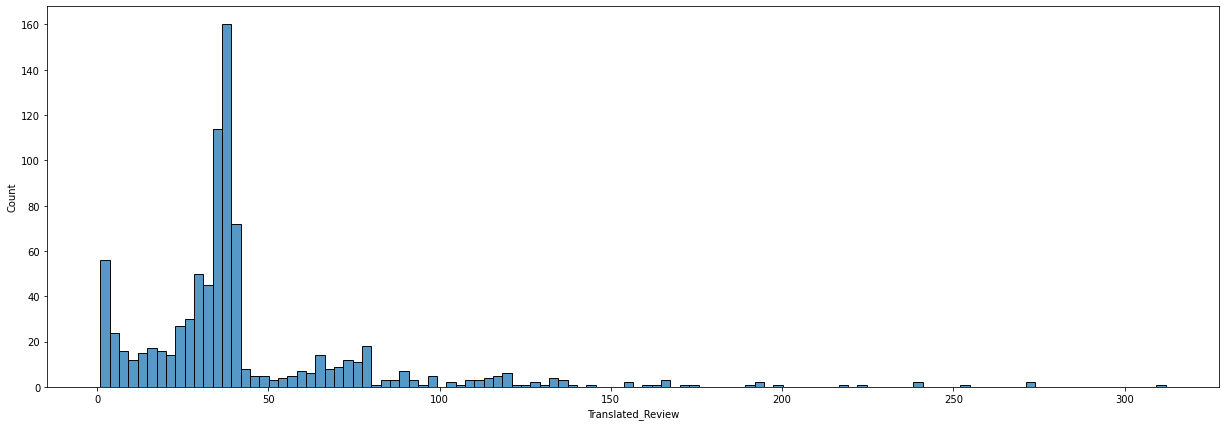

In [424]:

plt.figure(figsize=(21,7))
sns.histplot(df4['Translated_Review'])
